In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
highschool_df = pd.read_csv('data-files/seoul_highschool.csv')
highschool_df

,학교종류명,설립구분,학교명,도로명주소,고등학교구분명,고등학교일반실업구분명,설립일자,개교기념일
0,고등학교,공립,서울반도체고등학교,서울특별시 동대문구 겸재로 21,특성화고,전문계,19971220,19980702
1,고등학교,사립,미림마이스터고등학교,서울특별시 관악구 호암로 546,특목고,전문계,19910301,19910531
2,고등학교,사립,염광메디텍고등학교,서울특별시 노원구 월계로45가길 9,특성화고,전문계,19680301,19680301
3,고등학교,공립,서울웹툰애니메이션고등학교,서울특별시 서초구 과천대로 852-23,특성화고,전문계,19940105,19940506
4,고등학교,공립,솔샘고등학교,서울특별시 강북구 인수봉로 39,자율고,일반계,20090301,20090610
...,...,...,...,...,...,...,...,...
313,고등학교,공립,경기고등학교,서울특별시 강남구 영동대로 643,일반고,일반계,19001003,19001003
314,고등학교,공립,개포고등학교,서울특별시 강남구 개포로 402,일반고,일반계,19870512,19870512
315,고등학교,공립,가락고등학교,서울특별시 송파구 송이로 42,일반고,일반계,19881223,19890428
316,고등학교,국립,국립전통예술고등학교,서울특별시 금천구 시흥대로38길 62,특목고,일반계,19600513,19600513


In [4]:
highschool_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   학교종류명        318 non-null    object
 1   설립구분         318 non-null    object
 2   학교명          318 non-null    object
 3   도로명주소        318 non-null    object
 4   고등학교구분명      318 non-null    object
 5   고등학교일반실업구분명  318 non-null    object
 6   설립일자         318 non-null    int64 
 7   개교기념일        318 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 20.0+ KB


In [6]:
highschool_df['구'] = highschool_df['도로명주소'].map(lambda v: v.split()[1])

In [8]:
gu_names = highschool_df['구'].drop_duplicates().values
gu_names

array(['동대문구', '관악구', '노원구', '서초구', '강북구', '성북구', '은평구', '중구', '금천구',
       '송파구', '용산구', '강서구', '종로구', '강남구', '성동구', '강동구', '양천구', '구로구',
       '서대문구', '마포구', '중랑구', '도봉구', '영등포구', '광진구', '동작구'], dtype=object)

In [9]:
구별_고등학교_개수 = highschool_df['구'].value_counts().reset_index()
구별_고등학교_개수.columns = ['구', '고등학교_개수']
구별_고등학교_개수 = 구별_고등학교_개수.sort_values(by='고등학교_개수', ascending=False).reset_index(drop=True)
구별_고등학교_개수 = 구별_고등학교_개수[구별_고등학교_개수['구']!='압구'].reset_index(drop=True)

In [10]:
구별_고등학교_개수

,구,고등학교_개수
0,노원구,25
1,강서구,23
2,강남구,22
3,송파구,20
4,은평구,18
5,관악구,17
6,양천구,15
7,종로구,14
8,강동구,14
9,구로구,14


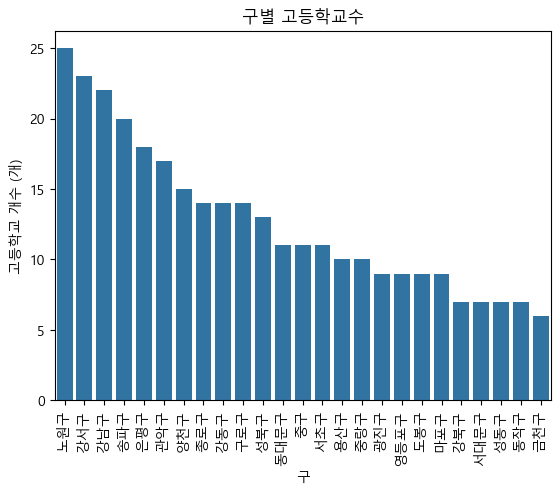

In [11]:
# 한글 패치
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# barplot
# sns.barplot( x = gu_names, y = gu_mean)
sns.barplot( data= 구별_고등학교_개수, x = '구', y = '고등학교_개수')
plt.xticks(rotation=90)
plt.title('구별 고등학교수')
plt.xlabel('구')
plt.ylabel('고등학교 개수 (개)')
plt.show()